# Final Exam - Aerospace Computing

In [1400]:
import MyFunc
import numpy as np
import matplotlib.pyplot as plt
import time

## Problem 1

In [1402]:
# create A matrix
A = np.array([[21, 2, 4, 6, 8, 10],
              [1, 22, 4, 6, 8, 10],
              [1, 2, 24, 6, 8, 10],
              [1, 2, 4, 26, 8, 10],
              [1, 2, 4, 6, 28, 10],
              [1, 2, 4, 6, 8, 30]], dtype = "float")

### Part A

In [1404]:
# Compute Eignevalues, eigenvectors
values, vectors = np.linalg.eig(np.copy(A))

print("Eigenvalues: ", values)

print("\nEigenvectors: \n", vectors)

Eigenvalues:  [20. 51. 20. 20. 20. 20.]

Eigenvectors: 
 [[-0.99723374  0.40824829  0.12042498  0.6066149   0.5005607  -0.15112119]
 [ 0.03324112  0.40824829 -0.78815595 -0.38529783 -0.43035073  0.1554233 ]
 [ 0.03324112  0.40824829  0.42299751 -0.61398687 -0.46217258  0.04966972]
 [ 0.03324112  0.40824829 -0.22454681 -0.04213878  0.58257595  0.63237489]
 [ 0.03324112  0.40824829 -0.22454681 -0.04213878 -0.03633817 -0.72376042]
 [ 0.03324112  0.40824829  0.29075522  0.32098711 -0.09959192  0.16374297]]


### Part B

In [1406]:
# Verify that eigenvalues are correct

for i in range(len(values)):
    Ax = np.dot(values[i], vectors[:,i])
    lambdax = np.dot(A.copy(), vectors[:,i])
    print("Ax - lambax:\n", (Ax-lambdax).round(4))

Ax - lambax:
 [ 0. -0. -0. -0. -0. -0.]
Ax - lambax:
 [ 0. -0. -0. -0. -0. -0.]
Ax - lambax:
 [-0.  0. -0.  0.  0. -0.]
Ax - lambax:
 [-0.  0.  0.  0.  0.  0.]
Ax - lambax:
 [ 0.  0. -0.  0.  0.  0.]
Ax - lambax:
 [ 0. -0. -0. -0.  0. -0.]


This verifies that it is the eigen system because Ax = lambdax

### Part C

In [1409]:
newvector = vectors[:,2] + vectors[:,3]

print("New Vector for repeated eigenvalues:\n", newvector)

New Vector for repeated eigenvalues:
 [ 0.72703987 -1.17345377 -0.19098935 -0.26668559 -0.26668559  0.61174233]


### Part D

In [1411]:
print("The error for the new vector (Ax - lambdax): \n", (np.dot(values[4], newvector) - np.dot(A.copy(), newvector)).round())

The error for the new vector (Ax - lambdax): 
 [0. 0. 0. 0. 0. 0.]


New eigenvector is an eigenvector for the repeated eigenvalue because Ax = lambdax with new eigenvector

## Problem 2

In [1414]:
# fft fuction
def fft(xlow, xhigh, barwidth = 0.2):
    N = 300
    T = 1/N

    x = np.linspace(xlow, xhigh, N, endpoint = False)

    y = 2.0*np.sin(0.4*np.pi*x + np.pi/8) - 3.5*np.cos(0.16*np.pi*x)

    fig, ax = plt.subplots(1,2)
    fig.set_size_inches([9,5])
    ax[0].plot(x,y)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_title("fft Plot")
    amp = abs(np.fft.fft(y))[:N//2]
    freq = np.fft.fftfreq(N,T)[:N//2]

    ax[1].bar(freq, 2*amp/N, width = barwidth)
    ax[1].plot(freq, 2*amp/N, '*r')
    ax[1].set_title("Amplitude vs. Frequency")
    ax[1].set_xlabel('frequency')
    ax[1].set_ylabel('amplitude')
    ax[1].set_xlim(0,30)

    return

### Part A

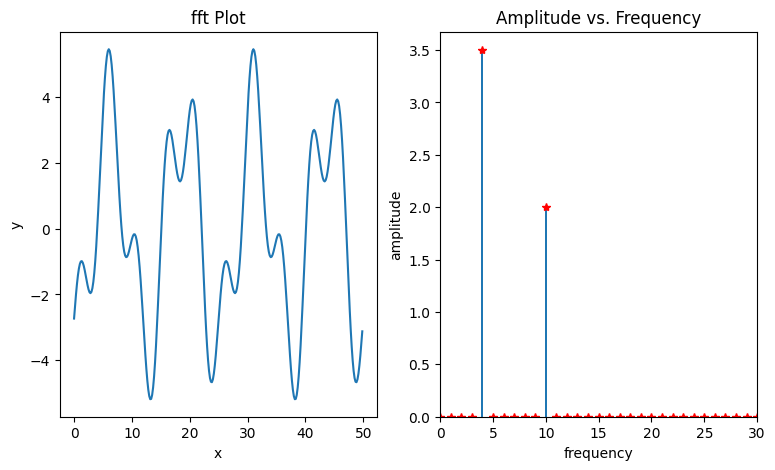

In [1416]:
# Plot function over range that includes at least 1 full cycle
fft(0, 50)

### Part B

In [1418]:
# Convert to function
def f(x): return 2.0*np.sin(0.4*np.pi*x + np.pi/8) - 3.5*np.cos(0.16*np.pi*x)

In [1419]:
# Use plot to get a rough idea of where 1 cycle completes, then compute function values to see if f(x) = f(0)
print("f(0) =", f(0))
print("\nf(25) =",f(25))
print("\nf(26) =",f(26))
print("\nf(27) =",f(27))



f(0) = -2.7346331352698203

f(25) = -2.734633135269825

f(26) = -1.0732387126872658

f(27) = -1.4085030547146697


f(0) and f(25) are the same, so that is where the cycle completes

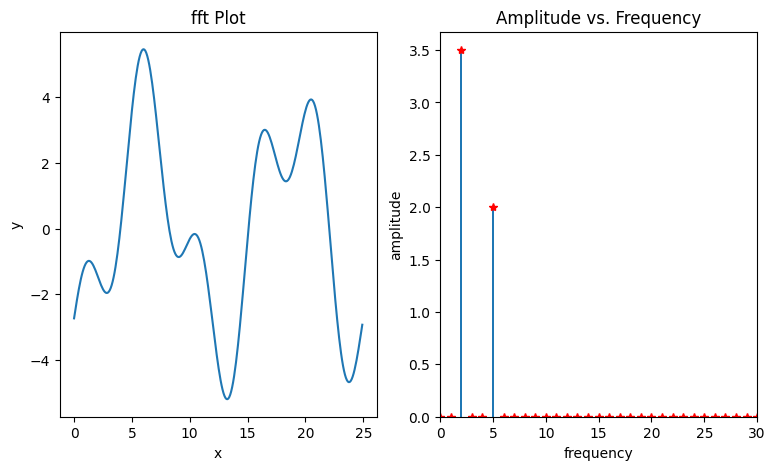

In [1421]:
# Plot fft over range that will cause fft to have minimum number of frequencies
fft(0, 25)

In [1422]:
# function for fft per unit x
def fftx(xlow, xhigh, barwidth = 0.2):
    N = 300
    T = 1/N

    x = np.linspace(xlow, xhigh, N, endpoint = False)

    y = 2.0*np.sin(0.4*np.pi*x + np.pi/8) - 3.5*np.cos(0.16*np.pi*x)

    fig, ax = plt.subplots(1,2)
    fig.set_size_inches([9,5])
    ax[0].plot(x,y)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_title("fft Plot")
    amp = abs(np.fft.fft(y))[:N//2]
    freq = np.fft.fftfreq(N,T)[:N//2]
    
    # freq / x
    ax[1].bar(freq/25, 2*amp/N, width = barwidth)
    ax[1].plot(freq/25, 2*amp/N, '*r')
    ax[1].set_title("Amplitude vs. Frequency (per unit x)")
    ax[1].set_xlabel('frequency')
    ax[1].set_ylabel('amplitude')

    return

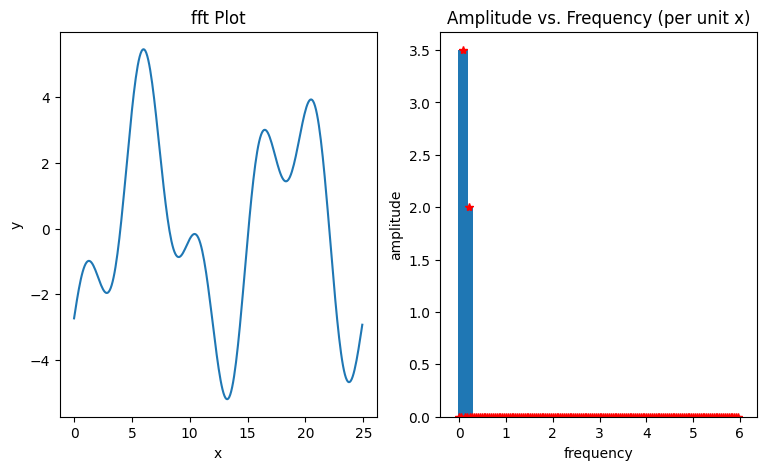

In [1423]:
# Plot magnitude vs. frequency per unit x
fftx(0,25)

## Problem 3

### Part A

In [1426]:
def prob_19(T) :
    n = len(T)
    # create mesh
    Ax = np.zeros(n)

    # for indexing
    m = int(np.sqrt(n))

    # first vals
    Ax[0] = -4.0*T[0] + T[1] + T[m]

    # repeated vals
    for k in range(1, m - 1):
        Ax[k] = T[k - 1]-4.0*T[k] + T[k + 1] + T[k + m]
    k = m - 1
    
    #constant val
    Ax[k] = T[m - 2] - 4.0*T[m - 1] + T[2*m - 1]

    # surrounding points
    for i in range (1, m - 1):
        k = i*m

        # set p2
        Ax[k] = T[k - m] - 4.0*T[k] + T[k + 1] + T[k + m]
        for j in range(1, m - 1):
            k = i*m + j
            # set p3
            Ax[k] = T[k - m] + T[k - 1] - 4.0*T[k] + T[k + 1] + T[k + m]
        k = (i + 1)*m - 1
        Ax[k] = T[k - m] + T[k - 1] - 4.0*T[k] + T[k + m]
        k = (m - 1)*m
        Ax[k] = T[k - m] - 4.0*T[k] + T[k + 1]
        for j in range (1, m - 1):
            k = (m - 1)*m + j
            Ax[k] = T[k - m] + T[k - 1] - 4.0*T[k] + T[k + 1]
        k = m**2 - 1
        Ax[k] = T[k - m] + T[k - 1] - 4.0*T[k]

    # return mesh
    return Ax

In [1427]:
import numpy as np

def b(n):
    # create array of long length
    # im doing 2d and then reshaping because its hard to visualize
    b = np.zeros((n, n), dtype="float64")


    # set bottom values
    for i in range(8):
        b[-1, i+15] = -400

    # reshape b to be 1D
    b = b.flatten()

    return b

b1 = b(38)
x1 = np.zeros(len(b1))
t0 = time.perf_counter()
sol1, i = MyFunc.conjGrad(prob_19, x1, b1)
t1 = time.perf_counter()
tnet2 = t1 - t0
# reshape conjGrad output to be a 2D array
sol1 = sol1.reshape([38, 38])

# creating an empty array to store the reversed column matrix
matrix_2 = []
 
# looping through matrix_1 and appending matrix_2
for i in range(len(sol1)):
    matrix_2.append(sol1[i][::-1])

sol1 = matrix_2
# add wall temp values back
# pad matrix

sol1 = np.pad(np.copy(sol1), 1)



### Part B

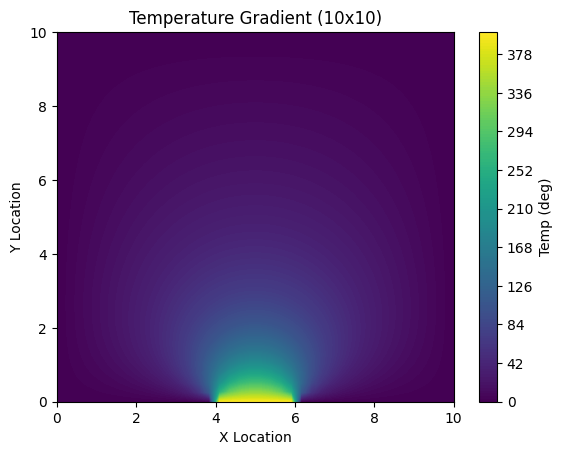

In [1429]:
# set bottom values
for i in range(8):
    sol1[-1, i+16] = 400
    

sol1 = np.flip(sol1, axis=0)



# set up an xy grid to plot with
x = np.linspace(0,10,40)
y = x

# plot contour plot with magma because scary ooh
plt.contourf(x, y, sol1, cmap="viridis", levels=150)
# formatting b/c yay
plt.xlabel("X Location")
plt.ylabel("Y Location")
plt.title("Temperature Gradient (10x10)")
plt.colorbar(label="Temp (deg)")
plt.show()

## Extra Credit

In [1431]:
b2 = b(40)
x2 = np.zeros(len(b2))
sol2, i = MyFunc.conjGrad(prob_19, x2, b2)
# reshape conjGrad output to be a 2D array
sol2 = sol2.reshape([40, 40])

matrix_3 = []
 
# looping through matrix_1 and appending matrix_2
for i in range(len(sol2)):
    matrix_3.append(sol2[i][::-1])

sol2 = np.array(matrix_3)

sol2[0,:] = 0

print(sol2)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.15010291 0.29950115 0.44748728 ... 0.47053849 0.31516322 0.15802303]
 [0.22603553 0.45101746 0.6738877  ... 0.70911388 0.47495074 0.23813797]
 ...
 [1.21335493 2.46119841 3.78040464 ... 5.22116463 3.38250345 1.66273127]
 [0.8295063  1.6835401  2.58844141 ... 3.59844341 2.32768131 1.1432143 ]
 [0.42113015 0.8550143  1.31538695 ... 1.83613048 1.1865641  0.5824446 ]]
